In [1]:
#aim: To perform upsampling and use interpolation, and to use downsalmpling and visualize the data

#Upsampling: It is the process of randomly duplicating the observations of minority class to reinforce their signal.
#Step1: Separate the observations from each class to different dataframes
#step2: Resample the minority class with replacement
#Step3: Combine the upsampled minority class with the original data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_datetime64_any_dtype as is_datetime

In [2]:
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv("NVDA.csv",index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-23,261.260010,266.119995,255.750000,256.339996,256.100677,50212000
2022-03-24,261.660004,283.200012,259.070007,281.500000,281.237183,87737900
2022-03-25,278.859985,283.579987,272.709991,276.920013,276.661469,57901600
2022-03-28,277.559998,282.500000,272.059998,282.190002,281.926514,42549400
2022-03-29,286.950012,289.459991,279.799988,286.559998,286.292450,48898400


In [4]:
close = df[['Close']]
close.head()

,Close
Date,
2022-03-23,256.339996
2022-03-24,281.500000
2022-03-25,276.920013
2022-03-28,282.190002
2022-03-29,286.559998


In [5]:
time = close['2022-03-23':'2023-03-23'].copy()
time

,Close
Date,
2022-03-23,256.339996
2022-03-24,281.500000
2022-03-25,276.920013
2022-03-28,282.190002
2022-03-29,286.559998
...,...
2023-03-17,257.250000
2023-03-20,259.000000
2023-03-21,261.989990


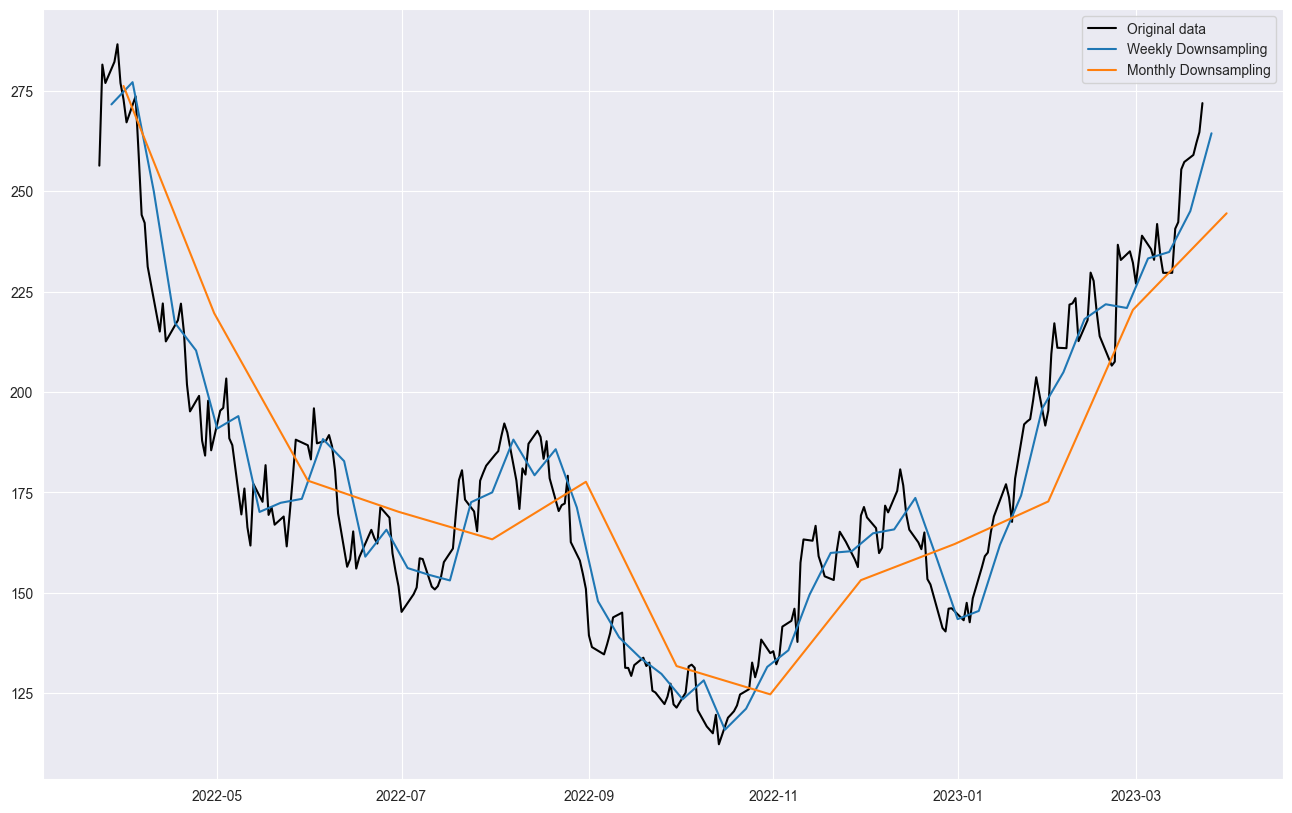

In [7]:
#Downsampling

weekly_downsample = time.resample('W').mean()
monthly_downsample = time.resample('M').mean()
plt.figure(figsize=(16,10))
plt.plot(time,label='Original data',color='black')
plt.plot(weekly_downsample,label='Weekly Downsampling')
plt.plot(monthly_downsample,label='Monthly Downsampling')
plt.legend()
plt.show()

In [20]:
#Upsampling

time = close['2022-03-23':'2023-03-23']
df_upsample = time.resample('H').asfreq()
df_upsample

,Close
Date,
2022-03-23 00:00:00,256.339996
2022-03-23 01:00:00,NaN
2022-03-23 02:00:00,NaN
2022-03-23 03:00:00,NaN
2022-03-23 04:00:00,NaN
...,...
2023-03-22 20:00:00,NaN
2023-03-22 21:00:00,NaN
2023-03-22 22:00:00,NaN


In [21]:
df_upsample['nearest_value'] = time.resample(upsample).fillna("nearest")
df_upsample['forward_fill'] = time.resample(upsample).ffill()
df_upsample['interpolate'] = time.resample(upsample).interpolate()

df_upsample.head()

,Close,nearest_value,forward_fill,interpolate
Date,,,,
2022-03-23 00:00:00,256.339996,256.339996,256.339996,256.339996
2022-03-23 01:00:00,NaN,256.339996,256.339996,257.388329
2022-03-23 02:00:00,NaN,256.339996,256.339996,258.436663
2022-03-23 03:00:00,NaN,256.339996,256.339996,259.484996
2022-03-23 04:00:00,NaN,256.339996,256.339996,260.533330


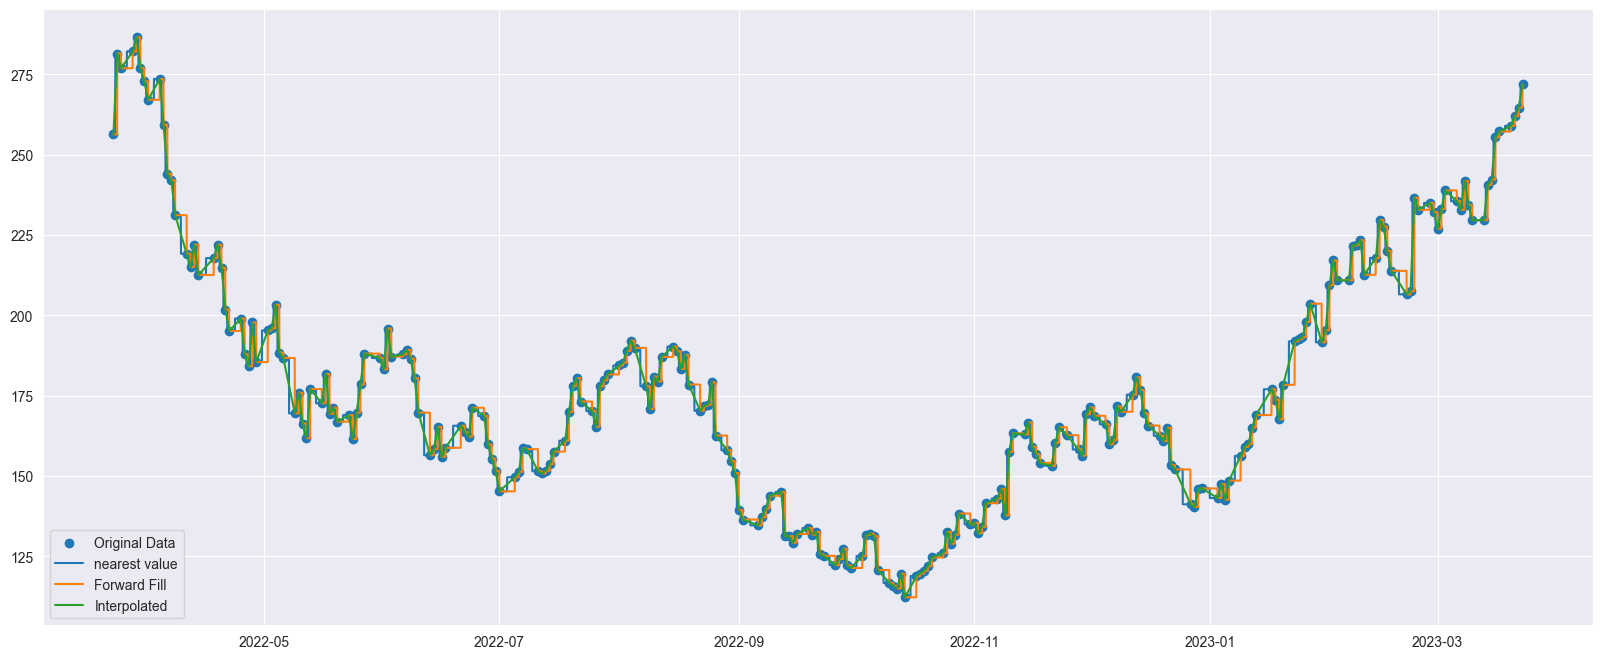

In [24]:
plt.figure(figsize=(20,8))
plt.scatter(df_upsample.index,df_upsample['Close'],label = 'Original Data')
plt.plot(df_upsample['nearest_value'],label = 'nearest value')
plt.plot(df_upsample['forward_fill'],label = 'Forward Fill')
plt.plot(df_upsample['interpolate'],label = 'Interpolated')
plt.legend()